In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt


In [2]:
!ls '/home/liaoqing/program data/xunlian/'

data.csv  report1.ipynb  未命名.ipynb


In [3]:
datadir = '/home/liaoqing/program data/xunlian/'
datafile = 'data.csv'

In [4]:
ds_data = pd.read_csv(datadir+datafile,engine='python',encoding='shift-jis')#shift-jis japanese encoding

In [5]:
ds_data.head(15)

,集計開始,集計終了,最高気温,品質情報
0,1980/7/31,1980/8/1,29.1,8
1,1980/8/2,1980/8/3,29.7,8
2,1980/8/4,1980/8/5,29.9,8
3,1980/8/6,1980/8/7,30.6,8
4,1980/8/8,1980/8/9,28.4,8
5,1980/8/10,1980/8/11,29.5,8
6,1980/8/12,1980/8/13,32.8,8
7,1980/8/14,1980/8/15,32.5,8
8,1980/8/16,1980/8/17,33.0,8
9,1980/8/18,1980/8/19,27.9,8


In [6]:
ds_data.tail(15)

,集計開始,集計終了,最高気温,品質情報
7291,2020/7/3,2020/7/4,26.7,8
7292,2020/7/5,2020/7/6,30.5,8
7293,2020/7/7,2020/7/8,28.9,8
7294,2020/7/9,2020/7/10,26.9,8
7295,2020/7/11,2020/7/12,29.3,8
7296,2020/7/13,2020/7/14,25.7,8
7297,2020/7/15,2020/7/16,28.3,8
7298,2020/7/17,2020/7/18,28.9,8
7299,2020/7/19,2020/7/20,34.4,8
7300,2020/7/21,2020/7/22,33.3,8


In [7]:
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   集計開始    7306 non-null   object 
 1   集計終了    7306 non-null   object 
 2   最高気温    7301 non-null   float64
 3   品質情報    7306 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 228.4+ KB


In [8]:
print(ds_data['集計開始'])

0       1980/7/31
1        1980/8/2
2        1980/8/4
3        1980/8/6
4        1980/8/8
          ...    
7301    2020/7/23
7302    2020/7/25
7303    2020/7/27
7304    2020/7/29
7305    2020/7/31
Name: 集計開始, Length: 7306, dtype: object


In [9]:
ds_data['年'] = ds_data['集計開始'].map(lambda x: int(x.split('/')[0]))#每次split分台麻烦干脆分为三个列
ds_data['月'] = ds_data['集計開始'].map(lambda x: int(x.split('/')[1]))
ds_data['日'] = ds_data['集計開始'].map(lambda x: int(x.split('/')[2]))

In [10]:
ds_data.head(15)

,集計開始,集計終了,最高気温,品質情報,年,月,日
0,1980/7/31,1980/8/1,29.1,8,1980,7,31
1,1980/8/2,1980/8/3,29.7,8,1980,8,2
2,1980/8/4,1980/8/5,29.9,8,1980,8,4
3,1980/8/6,1980/8/7,30.6,8,1980,8,6
4,1980/8/8,1980/8/9,28.4,8,1980,8,8
5,1980/8/10,1980/8/11,29.5,8,1980,8,10
6,1980/8/12,1980/8/13,32.8,8,1980,8,12
7,1980/8/14,1980/8/15,32.5,8,1980,8,14
8,1980/8/16,1980/8/17,33.0,8,1980,8,16
9,1980/8/18,1980/8/19,27.9,8,1980,8,18


In [11]:
ds_data['品質情報'].value_counts()

8    7248
4      53
0       5
Name: 品質情報, dtype: int64

In [12]:
re_mean = ds_data.groupby(['年','月'])['最高気温'].agg(np.mean).reset_index()#以年的月分组求每月平均

In [13]:
re_mean = re_mean.sort_values(['年','月'])#多打问号看说明阿，能双排序在年排序情况下排序月

In [14]:
re_mean.head(15)

,年,月,最高気温
0,1980,7,29.100000
1,1980,8,29.740000
2,1980,9,26.900000
3,1980,10,21.456250
4,1980,11,16.973333
5,1980,12,9.540000
6,1981,1,6.412500
7,1981,2,7.835714
8,1981,3,12.866667
9,1981,4,18.293333


In [15]:
ds0 = ds_data[ds_data['品質情報']==0].reset_index()
ds4 = ds_data[ds_data['品質情報']==4].reset_index()

In [16]:
ds_data[ds_data['品質情報']==0].index

Int64Index([2360, 5383, 5384, 5385, 5386], dtype='int64')

In [17]:
ds0

,index,集計開始,集計終了,最高気温,品質情報,年,月,日
0,2360,1993/7/3,1993/7/4,NaN,0,1993,7,3
1,5383,2010/1/21,2010/1/22,NaN,0,2010,1,21
2,5384,2010/1/23,2010/1/24,NaN,0,2010,1,23
3,5385,2010/1/25,2010/1/26,NaN,0,2010,1,25
4,5386,2010/1/27,2010/1/28,NaN,0,2010,1,27


In [18]:

def filling (l):#把输入df的缺失气温填充为同年同月的气温均值
    l_mean = np.zeros(len(l))
    j = 0
    for i in l.index:
        re_mean2 = re_mean[(re_mean['月'] == l['月'][i]) & (re_mean['年'] == l['年'][i])]['最高気温']
        #l['最高気温'][i] = re_mean 这样会报错顺序应该是先生成ndarry再插入df中，单个赋值会健康警告
        l_mean[j] = round(re_mean2,1)
        j+=1
    l['最高気温'] = l_mean
        
        #print(re_mean)

In [19]:
filling(ds0)
l_mean = []
l_mean = ds0['最高気温']
list(l_mean)

[28.0, 8.8, 8.8, 8.8, 8.8]

In [20]:
filling(ds4)
l2_mean = []
l2_mean = ds4['最高気温']
list(l2_mean)

[9.5,
 7.8,
 31.2,
 31.2,
 20.7,
 10.1,
 8.8,
 25.8,
 31.1,
 22.4,
 22.4,
 17.2,
 12.5,
 12.5,
 25.0,
 16.2,
 16.2,
 10.1,
 23.6,
 16.9,
 16.9,
 9.1,
 12.4,
 24.7,
 24.7,
 26.3,
 22.5,
 15.1,
 7.1,
 7.1,
 17.0,
 17.0,
 21.3,
 13.4,
 13.4,
 23.6,
 14.4,
 31.2,
 21.5,
 13.6,
 31.2,
 8.3,
 8.3,
 28.0,
 28.0,
 30.1,
 30.1,
 7.8,
 7.8,
 14.5,
 8.8,
 8.8,
 8.7]

In [21]:
ds_data.loc[ds_data['品質情報'] == 0,'最高気温'] = list(l_mean)#真的服了终于搞定 必须这种写法 加转换为list

In [22]:
ds_data.loc[ds_data['品質情報'] == 4,'最高気温'] = list(l2_mean)#真的服了终于搞定 必须这种写法 加转换为list

In [23]:
ds_data[ds_data['品質情報']==0]
ds_data[ds_data['品質情報']==4]

,集計開始,集計終了,最高気温,品質情報,年,月,日
64,1980/12/6,1980/12/7,9.5,4,1980,12,6
95,1981/2/6,1981/2/7,7.8,4,1981,2,6
187,1981/8/9,1981/8/10,31.2,4,1981,8,9
188,1981/8/11,1981/8/12,31.2,4,1981,8,11
225,1981/10/24,1981/10/25,20.7,4,1981,10,24
244,1981/12/1,1981/12/2,10.1,4,1981,12,1
281,1982/2/13,1982/2/14,8.8,4,1982,2,13
332,1982/5/26,1982/5/27,25.8,4,1982,5,26
374,1982/8/18,1982/8/19,31.1,4,1982,8,18
403,1982/10/15,1982/10/16,22.4,4,1982,10,15


In [24]:
ds_data[ds_data['年']=='19']['最高気温']

Series([], Name: 最高気温, dtype: float64)

<AxesSubplot:>

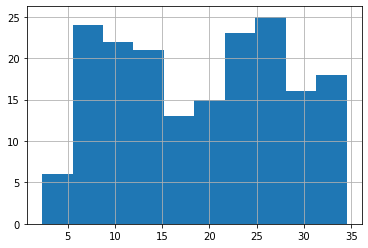

In [25]:
ds_data[ds_data['年']==1981]['最高気温'].hist(bins = 10)

<AxesSubplot:>

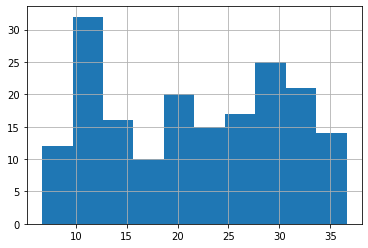

In [26]:
ds_data[ds_data['年']==2019]['最高気温'].hist(bins = 10)

<AxesSubplot:xlabel='年'>

/home/liaoqing/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/liaoqing/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


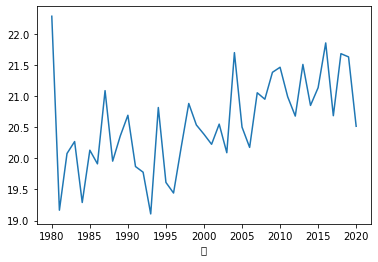

In [27]:
s = pd.Series(re_mean.groupby('年')['最高気温'].agg(np.mean))
s.plot()

In [28]:
res8 = re_mean[re_mean['月']==8]
res8

,年,月,最高気温
1,1980,8,29.740000
13,1981,8,31.237500
25,1982,8,31.146667
37,1983,8,32.712500
49,1984,8,33.937500
61,1985,8,33.820000
73,1986,8,32.706250
85,1987,8,33.466667
97,1988,8,31.486667
109,1989,8,32.006250


<AxesSubplot:>

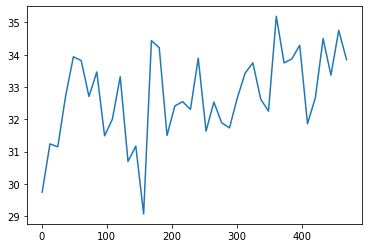

In [29]:
s2 = pd.Series(res8['最高気温'])
s2.plot()

In [30]:
trainY = list(res8['最高気温'])

In [31]:
trainX = []
for i in list(res8['年']):
    j = (i-1980)
    trainX.append(j)

In [32]:
plotX = list(res8['年'])

Using TensorFlow backend.


W: [[0.10708884]] b [30.257305]


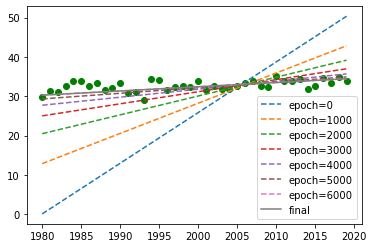

In [34]:
from keras.models import Sequential
plt.scatter(plotX,trainY,color = 'green')
model = keras.Sequential()
model.add(layers.Dense(1,kernel_initializer='uniform',activation='linear'))
optimizer = keras.optimizers.SGD(learning_rate= 0.001)
model.compile(loss = 'mse',optimizer = optimizer)
for i in range(6001):
    model.fit(trainX, trainY, epochs=1,batch_size = 64,verbose = 0)
    if i % 1000==0:
        plt.plot(plotX, model.predict(trainX), linestyle='--', label="epoch=%s" % i)
plt.plot(plotX,model.predict(trainX),label = 'final')
plt.legend()
W,b = model.layers[0].get_weights()
print('W:',W,'b',b)

In [35]:
W,b = model.layers[0].get_weights()
print('a1:',W,'a0',b)

a1: [[0.10708884]] a0 [30.257305]


In [38]:
y = W*80+b
print('2060年8月1日最高気温: %s '%y.round(2))

2060年8月1日最高気温: [[38.82]] 
